# Tasca Feature Engineering

Aprèn a gestionar paràmetres amb Python.



In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Nivell 1
- Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Normalitza els atributs numèrics amb StandardScaler.




In [2]:
players=pd.read_csv('./datasets/mlbbat10.csv')

In [3]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1199 non-null   object 
 1   team             1199 non-null   object 
 2   position         1199 non-null   object 
 3   game             1199 non-null   int64  
 4   at_bat           1199 non-null   int64  
 5   run              1199 non-null   int64  
 6   hit              1199 non-null   int64  
 7   double           1199 non-null   int64  
 8   triple           1199 non-null   int64  
 9   home_run         1199 non-null   int64  
 10  rbi              1199 non-null   int64  
 11  total_base       1199 non-null   int64  
 12  walk             1199 non-null   int64  
 13  strike_out       1199 non-null   int64  
 14  stolen_base      1199 non-null   int64  
 15  caught_stealing  1199 non-null   int64  
 16  obp              1199 non-null   float64
 17  slg           

Para este ejercicio voy a utilizar la clase ColumnTransformer de Scikit Learn. Dentro de la clase especificaré diferentres transformers para las variables numéricas y categóricas:

- Numéricas: StandardScaler que transforma la distribución de las variables a una variable con media cero y desviación estándard 1.

- Categóricas: Transformación One Hot encoding, eliminando la primera variable, para las variables equipo y posición. El nombre del jugador no lo modificaré.


In [4]:
# Defino las columnas por tipos
numericas=players.select_dtypes(exclude='object').columns
categoricas=['team','position']

In [5]:
# Instanciar las funciones de transformación

# Estandarización
estandarizador=StandardScaler()

# One hot encoding
Dummies=OneHotEncoder(drop='first')

In [6]:
# Genero la transformacion
operacion=ColumnTransformer(transformers=[('Estandarizar',estandarizador,numericas),
                                          ('One_Hot_Enc',Dummies,categoricas)],
                            remainder='passthrough',) # Incluye name en el array transformado.

In [7]:
# Aplico las transformaciones y las guardo en una variable / data_tr
players_tr_l=operacion.fit_transform(X=players,y=None)

El dataset **players_tr** es un array de numpy, con lo que ha perdido la información del nombre de las variables. Para recuperar el nombre de las variables puedo usar la propiedad _get_feature_names()_ de la transformación OneHotEncoder().

In [8]:
cat_features=operacion.named_transformers_['One_Hot_Enc'].get_feature_names()
cat_features

array(['x0_ATL', 'x0_BAL', 'x0_BOS', 'x0_CHC', 'x0_CIN', 'x0_CLE',
       'x0_COL', 'x0_CWS', 'x0_DET', 'x0_FLA', 'x0_HOU', 'x0_KC',
       'x0_LAA', 'x0_LAD', 'x0_MIL', 'x0_MIN', 'x0_NYM', 'x0_NYY',
       'x0_OAK', 'x0_PHI', 'x0_PIT', 'x0_SD', 'x0_SEA', 'x0_SF', 'x0_STL',
       'x0_TB', 'x0_TEX', 'x0_TOR', 'x0_WSH', 'x1_1B', 'x1_2B', 'x1_3B',
       'x1_C', 'x1_DH', 'x1_OF', 'x1_P', 'x1_SS'], dtype=object)

Para generar una lista con los nombres de las variables, concateno los arrays del OneHotEncoder y el de las variables numéricas y les añado name como nombre de la variable que no transformé.

In [9]:
columnas=np.concatenate([numericas,cat_features]).tolist()+['Name']

In [10]:
# Dataset transformado.
players_tr=pd.DataFrame(players_tr_l,
                        columns=columnas,
                        dtype=None)

In [11]:
# Infiero tipos numéricos
players_tr[numericas]=players_tr[numericas].astype('float')
players_tr[cat_features]=players_tr[cat_features].astype('int')


**Resultado**

**Variables categóricas**

Veamos como quedan las primeras filas de las variables categóricas. Hemos convertido dos variables categóricas en 37 variables dummie (29 para equipos y 8 para posiciones)  

In [12]:
# categorias equipo
players.team.unique()

array(['SEA', 'NYY', 'TEX', 'CWS', 'MIL', 'BOS', 'BAL', 'MIN', 'CIN',
       'DET', 'LAA', 'HOU', 'SD', 'LAD', 'TB', 'ATL', 'STL', 'KC', 'PIT',
       'TOR', 'FLA', 'COL', 'PHI', 'NYM', 'ARI', 'CHC', 'SF', 'WSH',
       'OAK', 'CLE'], dtype=object)

In [13]:
# categorias posicion
players.position.unique()

array(['OF', 'SS', '3B', '2B', '1B', 'DH', 'C', 'P', '-'], dtype=object)

In [14]:
# Primeras filas variables dummies 
players_tr[cat_features].head()

,x0_ATL,x0_BAL,x0_BOS,x0_CHC,x0_CIN,x0_CLE,x0_COL,x0_CWS,x0_DET,x0_FLA,x0_HOU,x0_KC,x0_LAA,x0_LAD,x0_MIL,x0_MIN,x0_NYM,x0_NYY,x0_OAK,x0_PHI,x0_PIT,x0_SD,x0_SEA,x0_SF,x0_STL,x0_TB,x0_TEX,x0_TOR,x0_WSH,x1_1B,x1_2B,x1_3B,x1_C,x1_DH,x1_OF,x1_P,x1_SS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**Variables numéricas**

StandardScaler transforma la distribución de mis variables en variables con media cero y desviaciópn estandard 1. 

In [15]:
# Estadisticos de variables numéricas
players_tr[numericas].describe()

,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
count,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03
mean,-5.781679e-16,-2.251929e-16,9.794778e-16,5.007578e-16,-4.027915e-16,-4.323295e-16,-7.538220e-15,-2.243225e-15,2.090812e-15,1.339120e-15,2.328783e-15,3.103439e-15,-2.547679e-15,1.981919e-15,-2.275633e-15,1.104112e-15
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,-1.000220e+00,-7.333700e-01,-6.572297e-01,-6.840123e-01,-6.548189e-01,-4.510451e-01,-5.220833e-01,-6.355092e-01,-6.638798e-01,-6.348314e-01,-7.446176e-01,-3.809985e-01,-4.357840e-01,-1.187220e+00,-1.006928e+00,-1.102732e+00
25%,-8.588738e-01,-7.280522e-01,-6.572297e-01,-6.840123e-01,-6.548189e-01,-4.510451e-01,-5.220833e-01,-6.355092e-01,-6.638798e-01,-6.348314e-01,-7.185931e-01,-3.809985e-01,-4.357840e-01,-1.187220e+00,-1.006928e+00,-1.102732e+00
50%,-3.944497e-01,-5.366122e-01,-5.462828e-01,-5.683761e-01,-5.622985e-01,-4.510451e-01,-5.220833e-01,-5.603933e-01,-5.682809e-01,-5.383473e-01,-4.843726e-01,-3.809985e-01,-4.357840e-01,2.857485e-01,1.499588e-01,2.464975e-01
75%,6.757448e-01,4.631302e-01,3.228007e-01,3.952593e-01,3.629052e-01,1.734388e-01,2.071130e-02,3.034394e-01,3.219833e-01,3.300093e-01,4.004604e-01,-2.266162e-01,2.701938e-02,6.843163e-01,6.627183e-01,6.893215e-01
max,2.250748e+00,2.882719e+00,3.595732e+00,3.440347e+00,3.878679e+00,8.291730e+00,6.805644e+00,4.096792e+00,3.530520e+00,4.864761e+00,4.746552e+00,1.011700e+01,7.894677e+00,4.589126e+00,1.594380e+01,5.816394e+00


## Nivell 2

- Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.



In [16]:
from sklearn.decomposition import PCA

In [17]:
# Instancio el modelo PCA
component=PCA()

In [18]:
players_tr.info()#.select_dtypes(exclude='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game             1199 non-null   float64
 1   at_bat           1199 non-null   float64
 2   run              1199 non-null   float64
 3   hit              1199 non-null   float64
 4   double           1199 non-null   float64
 5   triple           1199 non-null   float64
 6   home_run         1199 non-null   float64
 7   rbi              1199 non-null   float64
 8   total_base       1199 non-null   float64
 9   walk             1199 non-null   float64
 10  strike_out       1199 non-null   float64
 11  stolen_base      1199 non-null   float64
 12  caught_stealing  1199 non-null   float64
 13  obp              1199 non-null   float64
 14  slg              1199 non-null   float64
 15  bat_avg          1199 non-null   float64
 16  x0_ATL           1199 non-null   int32  
 17  x0_BAL        

Tengo un dataset con 53 variables de tipo numérico y una de tipo categórico (name). El análisis de componentes principales se aplica a los campos numéricos de un conjunto de datos, en este caso no tiene sentido hacer una transformación para name por lo que lo voy a descartar.

In [19]:
# Elimino la columna Name
players_tr_PCA=players_tr.select_dtypes(exclude='object')

# Ajusto y entreno el modelo con el dataset.
componentes_principales=component.fit_transform(players_tr_PCA)
componentes_principales

array([[ 8.28693230e+00, -1.93072239e+00,  4.45236977e+00, ...,
         5.03431329e-03,  9.07628057e-03,  3.44018684e-14],
       [ 7.91249949e+00, -1.44995101e+00,  7.40915063e-01, ...,
         5.86390783e-03,  4.32860299e-03, -1.71524478e-15],
       [ 8.01262126e+00, -7.78362116e-01, -2.01057573e+00, ...,
        -4.69993145e-03,  4.71804724e-03,  8.85044542e-15],
       ...,
       [-2.79730230e+00, -1.14188032e+00, -1.42788918e-01, ...,
        -8.04515039e-03, -9.35960205e-04,  9.05371307e-16],
       [-2.80260684e+00, -1.13788214e+00, -1.32700960e-01, ...,
        -1.04983920e-02,  1.79623257e-03,  2.74337204e-16],
       [-2.81318847e+00, -1.14001317e+00, -1.41532669e-01, ...,
        -7.95093821e-03,  3.54320402e-05,  1.18623081e-16]])

El array _componentes_principales_ contiene la transformación de las variables.

In [20]:
players_tr_PCA.shape

(1199, 53)

In [21]:
#for n in [1,2,3,5,7,51]:
#    component=PCA(n_components=n)
#    component.fit_transform(players_tr_PCA)
#    score=component.score(players_tr_PCA)
#    print(n,score)

In [22]:
# Reducción de dimensionalidad. Varianza explicada del 95%
component_95=PCA(n_components=0.95)
component_95.fit_transform(players_tr_PCA)
component_95.explained_variance_ratio_.cumsum()

array([0.65363156, 0.7607405 , 0.83095187, 0.85427766, 0.8687957 ,
       0.87999456, 0.88980434, 0.89881609, 0.90686782, 0.91437929,
       0.92017293, 0.92534174, 0.9297096 , 0.93349633, 0.93687379,
       0.94015528, 0.94305456, 0.9455081 , 0.94777644, 0.94994719,
       0.95207282])

Vemos que las 21 primeras variables explican el 95% de la varianza del dataset.

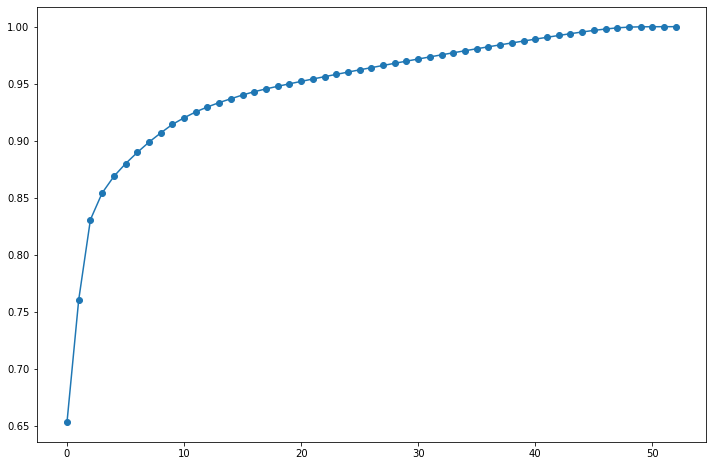

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.plot(component.explained_variance_ratio_.cumsum(),
         marker='o');

## Nivell 3
- Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.




In [24]:
players.describe()

,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000,1199.000000
mean,50.534612,137.909091,17.771476,35.491243,7.077565,0.722269,3.847373,16.920767,55.555463,13.159299,28.612177,2.46789,0.941618,0.205531,0.237613,0.159374
std,49.544371,188.126913,27.051262,51.908498,10.812941,1.601990,7.372345,26.636637,83.717936,20.737459,38.441364,6.48013,2.161646,0.173192,0.236077,0.144587
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,37.000000,3.000000,6.000000,1.000000,0.000000,0.000000,2.000000,8.000000,2.000000,10.000000,0.00000,0.000000,0.255000,0.273000,0.195000
75%,84.000000,225.000000,26.500000,56.000000,11.000000,1.000000,4.000000,25.000000,82.500000,20.000000,44.000000,1.00000,1.000000,0.324000,0.394000,0.259000
max,162.000000,680.000000,115.000000,214.000000,49.000000,14.000000,54.000000,126.000000,351.000000,114.000000,211.000000,68.00000,18.000000,1.000000,4.000000,1.000000


Voy a explorar visualmente que conjunto de datos tiene outliers y después voy a hacer diferentes transformaciones para ver como se comportan los diferentes métodos.  

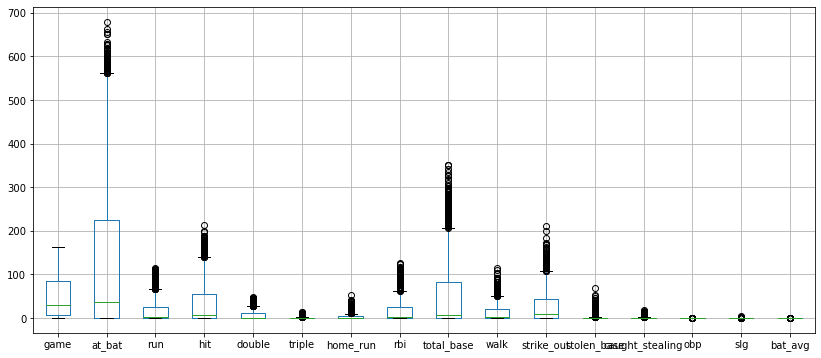

In [25]:
# Representación boxplots
fig, ax=plt.subplots(figsize=(14,6))
players.boxplot();

Voy a escoger las variables _game_, _at_bat_, _double_ y _total_base_. 

In [26]:
variables=['game','at_bat','double','total_base']
seleccion=players[variables]

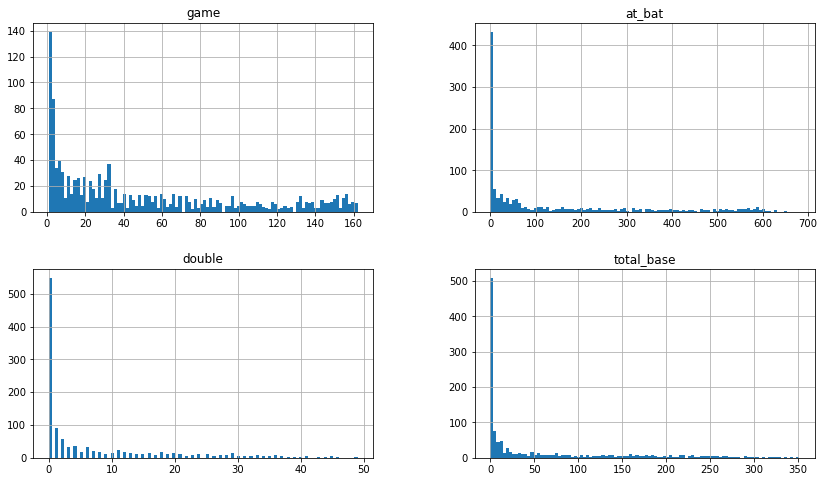

In [27]:
# Representación histogramas
seleccion.hist(figsize=(14,8),bins=100);

In [28]:
from sklearn.preprocessing import RobustScaler,QuantileTransformer,PowerTransformer,MinMaxScaler, MaxAbsScaler

**Estandarización**

Veamos como queda la distribución de las variables después de aplicar una estandarización con la clase StandardScaler.

In [29]:
# Instanciación StandardScaler
scaler1=StandardScaler()

# Ajuste y transformacion
estandarizacion=scaler1.fit_transform(seleccion)

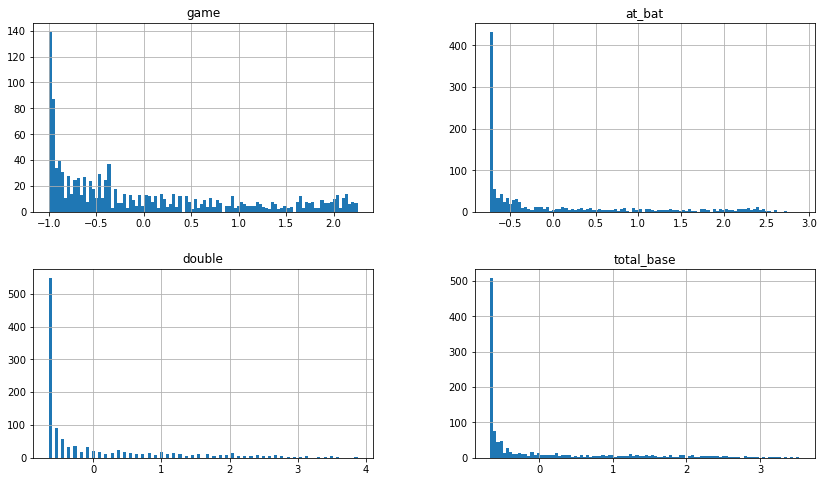

In [30]:
estandarizacion=pd.DataFrame(estandarizacion,columns=seleccion.columns)

# Representación histogramas
estandarizacion.hist(figsize=(14,8),bins=100);

 **MinMaxScaler**

In [31]:
# Instancia transformer
minmax=MinMaxScaler()

# Ajuste y transformacion
normalizacion=minmax.fit_transform(seleccion)

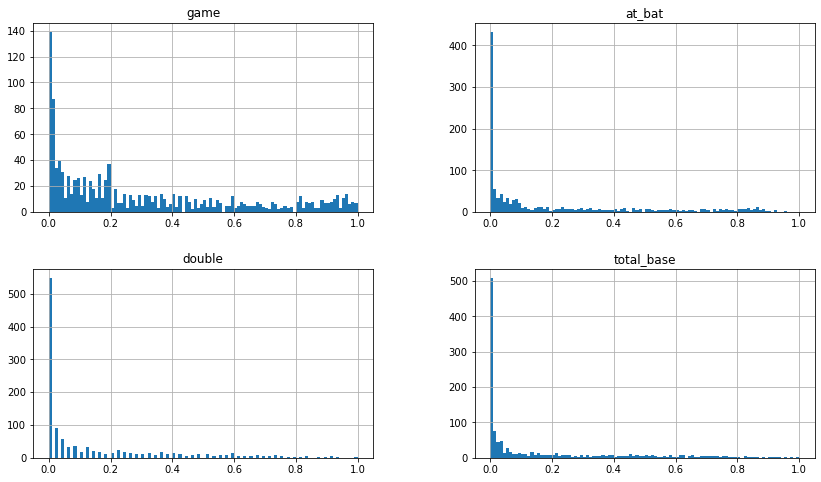

In [32]:
normalizacion=pd.DataFrame(normalizacion,columns=seleccion.columns)
# Representación histogramas
normalizacion.hist(figsize=(14,8),bins=100);

**Robust Scaler**

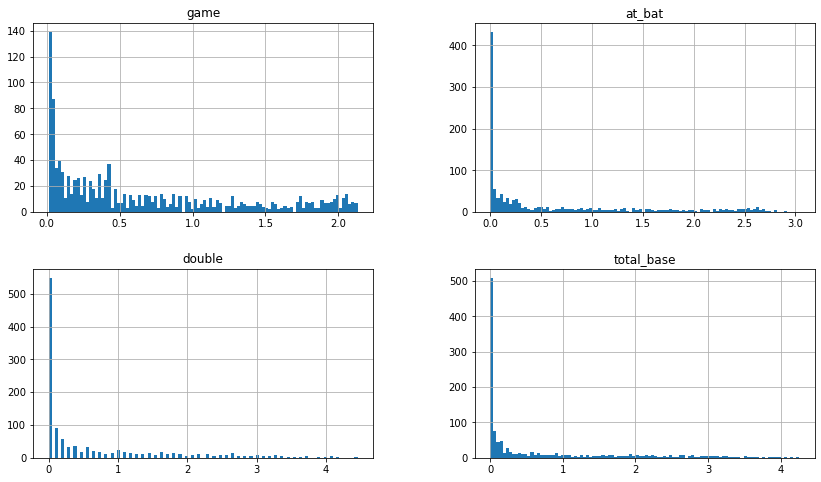

In [33]:
# Instancia transformer
Robust=RobustScaler(with_centering=False)

# Ajuste y transformacion
Robust_tr=Robust.fit_transform(seleccion)

Robust_tr=pd.DataFrame(Robust_tr,columns=seleccion.columns)
# Representación histogramas
Robust_tr.hist(figsize=(14,8),bins=100);

**Power Transform**

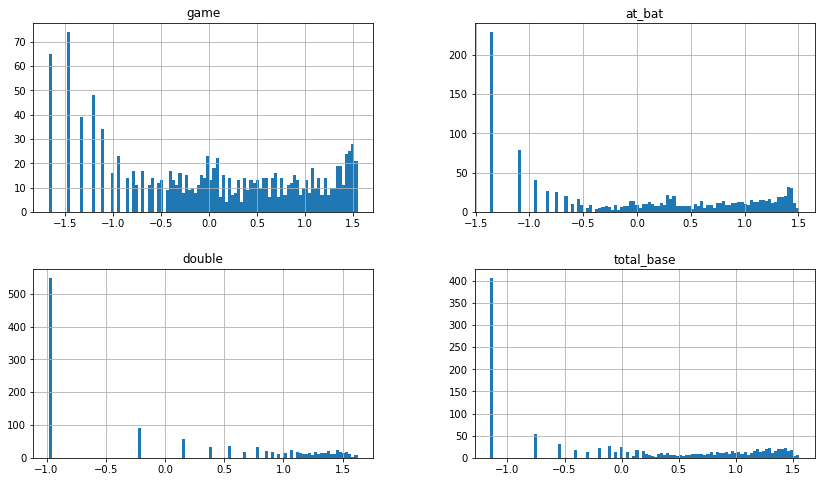

In [34]:
# Instancia transformer
box_cox=PowerTransformer(method='yeo-johnson',
                         standardize=True)

# Ajuste y transformacion
box_cox_tr=box_cox.fit_transform(seleccion)

box_cox_tr=pd.DataFrame(box_cox_tr,columns=seleccion.columns)
# Representación histogramas
box_cox_tr.hist(figsize=(14,8),bins=100);

**QuantileTransformer (Gaussian dist.)**

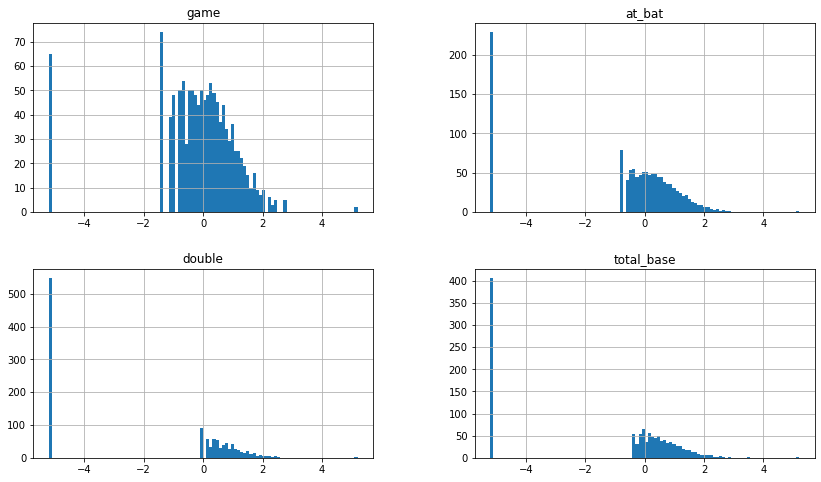

In [35]:
# Instancia transformer
QT_gau=QuantileTransformer(output_distribution='normal',
                           n_quantiles=150)

# Ajuste y transformacion
QT_tr=QT_gau.fit_transform(seleccion)

QT_tr=pd.DataFrame(QT_tr,columns=seleccion.columns)
# Representación histogramas
QT_tr.hist(figsize=(14,8),bins=100);